<a href="https://colab.research.google.com/github/HJJunn/E-commerce/blob/main/%EC%9D%B4%EC%BB%A4%EB%A8%B8%EC%8A%A4_%EA%B3%A0%EA%B0%9D_%EC%84%B8%EB%B6%84%ED%99%94_%EC%B5%9C%EC%A2%85%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
Discount = pd.read_csv("/content/drive/MyDrive/데이터분석기초/Discount_info.csv")
Customer = pd.read_csv("/content/drive/MyDrive/데이터분석기초/Customer_info.csv")
Marketing = pd.read_csv("/content/drive/MyDrive/데이터분석기초/Marketing_info.csv")
OnlineSales = pd.read_csv("/content/drive/MyDrive/데이터분석기초/Onlinesales_info.csv")
Tax = pd.read_csv("/content/drive/MyDrive/데이터분석기초/Tax_info.csv")

# (1) 데이터 확인

In [3]:
Discount

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


In [4]:
Discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       204 non-null    object
 1   제품카테고리  204 non-null    object
 2   쿠폰코드    204 non-null    object
 3   할인율     204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [5]:
Discount.isnull().sum()

,0
월,0
제품카테고리,0
쿠폰코드,0
할인율,0


In [6]:
Customer

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [7]:
Marketing

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30
...,...,...,...
360,2019-12-27,4000,3396.87
361,2019-12-28,4000,3246.84
362,2019-12-29,4000,2546.58
363,2019-12-30,4000,674.31


In [8]:
OnlineSales

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [9]:
Tax

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


#(2) 데이터 전처리


In [10]:
Marketing['날짜']= pd.to_datetime(Marketing.날짜)
Marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      365 non-null    datetime64[ns]
 1   오프라인비용  365 non-null    int64         
 2   온라인비용   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 8.7 KB


In [11]:
#OnlineSales + Customer
df1 = pd.merge(OnlineSales, Customer, how = 'left', left_on = '고객ID', right_on= '고객ID')
df1

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


## '월' 파생변수 생성 후 데이터 합치기

In [12]:
df1['거래날짜'] = pd.to_datetime(df1.거래날짜)

In [13]:
df1['월'] = df1['거래날짜'].dt.month

In [14]:
def toMonth(x):
    month = ''
    if x == 1:
        month = 'Jan'
    elif x == 2:
        month = 'Feb'
    elif x == 3:
        month = 'Mar'
    elif x == 4:
        month = 'Apr'
    elif x == 5:
        month = 'May'
    elif x == 6:
        month = 'Jun'
    elif x == 7:
        month = 'Jul'
    elif x == 8:
        month = 'Aug'
    elif x == 9:
        month = 'Sep'
    elif x == 10:
        month = 'Oct'
    elif x == 11:
        month = 'Nov'
    elif x == 12:
        month = 'Dec'

    return month

In [15]:
df1['월'] = df1['월'].apply(lambda x : toMonth(x))
df1.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,Jan
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,Jan
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,Jan
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,Jan
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used,남,Chicago,12,Jan


In [16]:
#df1 + Discount
df2 = pd.merge(df1, Discount, how = 'left' , left_on = ['제품카테고리', '월'], right_on = ['제품카테고리','월'])
df2

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,Jan,ELEC10,10.0
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,Jan,ELEC10,10.0
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,Jan,OFF10,10.0
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,Jan,SALE10,10.0
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,Jan,AIO10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,Dec,ELEC30,30.0
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,Dec,SALE30,30.0
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,Dec,ELEC30,30.0
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,Dec,ELEC30,30.0


## 결측값 확인


In [17]:
#결측값 확인
df2.isnull().sum()

,0
고객ID,0
거래ID,0
거래날짜,0
제품ID,0
제품카테고리,0
수량,0
평균금액,0
배송료,0
쿠폰상태,0
성별,0


In [18]:
#쿠폰코드가 null인 데이터 400개
null_쿠폰코드 = df2[df2['쿠폰코드'].isnull()]
null_쿠폰코드

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율
62,USER_1358,Transaction_0020,2019-01-01,Product_1138,Fun,4,9.27,6.50,Used,남,Chicago,12,Jan,NaN,NaN
95,USER_0585,Transaction_0046,2019-01-02,Product_0863,Backpacks,1,103.15,6.50,Clicked,여,New York,46,Jan,NaN,NaN
157,USER_1421,Transaction_0078,2019-01-02,Product_0950,Fun,1,7.42,6.50,Used,여,California,10,Jan,NaN,NaN
178,USER_0906,Transaction_0095,2019-01-02,Product_0196,Fun,2,7.42,6.50,Not Used,여,Washington DC,40,Jan,NaN,NaN
193,USER_0954,Transaction_0105,2019-01-02,Product_0886,Google,1,11.54,17.96,Clicked,여,California,30,Jan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44213,USER_0034,Transaction_19979,2019-10-30,Product_0863,Backpacks,1,79.99,6.00,Clicked,여,New Jersey,2,Oct,NaN,NaN
45167,USER_0643,Transaction_20483,2019-11-07,Product_0863,Backpacks,1,79.99,6.00,Not Used,여,California,34,Nov,NaN,NaN
45807,USER_1435,Transaction_20841,2019-11-12,Product_0863,Backpacks,1,99.99,6.00,Clicked,여,Chicago,3,Nov,NaN,NaN
46239,USER_1174,Transaction_21068,2019-11-15,Product_0863,Backpacks,1,79.99,6.00,Used,여,Chicago,35,Nov,NaN,NaN


In [19]:
#쿠폰코드와 할인율 모두 null인 데이터 6512개
#결측값 있는 곳은 쿠폰코드와 할인율이 동시에 null
df2[df2['쿠폰코드'].isnull() & df2['할인율'].isnull()]

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,월,쿠폰코드,할인율
62,USER_1358,Transaction_0020,2019-01-01,Product_1138,Fun,4,9.27,6.50,Used,남,Chicago,12,Jan,NaN,NaN
95,USER_0585,Transaction_0046,2019-01-02,Product_0863,Backpacks,1,103.15,6.50,Clicked,여,New York,46,Jan,NaN,NaN
157,USER_1421,Transaction_0078,2019-01-02,Product_0950,Fun,1,7.42,6.50,Used,여,California,10,Jan,NaN,NaN
178,USER_0906,Transaction_0095,2019-01-02,Product_0196,Fun,2,7.42,6.50,Not Used,여,Washington DC,40,Jan,NaN,NaN
193,USER_0954,Transaction_0105,2019-01-02,Product_0886,Google,1,11.54,17.96,Clicked,여,California,30,Jan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44213,USER_0034,Transaction_19979,2019-10-30,Product_0863,Backpacks,1,79.99,6.00,Clicked,여,New Jersey,2,Oct,NaN,NaN
45167,USER_0643,Transaction_20483,2019-11-07,Product_0863,Backpacks,1,79.99,6.00,Not Used,여,California,34,Nov,NaN,NaN
45807,USER_1435,Transaction_20841,2019-11-12,Product_0863,Backpacks,1,99.99,6.00,Clicked,여,Chicago,3,Nov,NaN,NaN
46239,USER_1174,Transaction_21068,2019-11-15,Product_0863,Backpacks,1,79.99,6.00,Used,여,Chicago,35,Nov,NaN,NaN


## 할인율 결측값 대체

In [20]:
# 월별 할인율 확인
Discount.groupby(by = ['월'])['할인율'].mean().reset_index()

,월,할인율
0,Apr,10.0
1,Aug,20.0
2,Dec,30.0
3,Feb,20.0
4,Jan,10.0
5,Jul,10.0
6,Jun,30.0
7,Mar,30.0
8,May,20.0
9,Nov,20.0


In [21]:
#결측값 평균값으로 대체
df2.loc[(df2['월'].isin(['Jan', 'Apr', 'Jul', 'Oct'])) & (df2['할인율'].isnull()), '할인율'] = 10.0
df2.loc[(df2['월'].isin(['Feb', 'May', 'Aug', 'Nov'])) & (df2['할인율'].isnull()), '할인율'] = 20.0
df2.loc[(df2['월'].isin(['Mar', 'Jun', 'Sep', 'Dec'])) & (df2['할인율'].isnull()), '할인율'] = 30.0

In [22]:
df2.isnull().sum()

,0
고객ID,0
거래ID,0
거래날짜,0
제품ID,0
제품카테고리,0
수량,0
평균금액,0
배송료,0
쿠폰상태,0
성별,0


## 고객 생애 가치(CLV) 구하기


**고객 생애 가치 구하는 식**

**고객 가치 = 평균 구매 가치 x 평균 구매 빈도**

**평균 구매 가치 = 특정 기간 내 총 수익/특정 기간 내 구매 횟수**

**CLV = 고객 가치 x 평균 고객 유지 기간**

In [23]:
#쿠폰 상태에 따라 실제수익 구하기
def total_revenue(row):
    if row['쿠폰상태'] == 'Used' :
        revenue = (row['수량'] * row['평균금액']) * (1 - row['할인율']/100) + row['배송료']
    else :
        revenue = (row['수량'] * row['평균금액'])+ row['배송료']
    return revenue

df2['실제수익'] = df2.apply(lambda x : total_revenue(x), axis = 1)

In [24]:
##평균 구매 가치
df3 = df2.groupby(by = '고객ID')[['거래ID', '실제수익','거래날짜', '가입기간']].agg(
    구매횟수 = ('거래ID','count'),
    총수익 = ('실제수익', 'sum'),
    거래날짜 = ('거래날짜', 'max'),
    가입기간 = ('가입기간', 'mean')
)

#마지막 거래날짜 계산
df3['거래날짜'] = pd.to_datetime(df3.거래날짜)
df3['거래날짜'] = dt.datetime(2020,1,1) - df3['거래날짜']
df3['거래날짜'] = df3['거래날짜'].apply(lambda x: x.days+1)


df3['평균구매가치'] = df3['총수익']/df3['구매횟수']
df3

,구매횟수,총수익,거래날짜,가입기간,평균구매가치
고객ID,,,,,
USER_0000,2,171.693,109,31.0,85.846500
USER_0001,60,13718.492,61,20.0,228.641533
USER_0002,23,1508.565,75,39.0,65.589783
USER_0003,17,1335.733,19,25.0,78.572529
USER_0004,36,1873.212,109,31.0,52.033667
...,...,...,...,...,...
USER_1463,7,811.480,272,5.0,115.925714
USER_1464,40,2765.158,89,43.0,69.128950
USER_1465,8,149.497,196,25.0,18.687125


In [25]:
#고객 가치
df3['평균구매빈도'] = df3['구매횟수']/12  #1년간의 평균구매빈도 구하기
df3['고객가치'] = df3['평균구매가치'] * df3['평균구매빈도']
df3

,구매횟수,총수익,거래날짜,가입기간,평균구매가치,평균구매빈도,고객가치
고객ID,,,,,,,
USER_0000,2,171.693,109,31.0,85.846500,0.166667,14.307750
USER_0001,60,13718.492,61,20.0,228.641533,5.000000,1143.207667
USER_0002,23,1508.565,75,39.0,65.589783,1.916667,125.713750
USER_0003,17,1335.733,19,25.0,78.572529,1.416667,111.311083
USER_0004,36,1873.212,109,31.0,52.033667,3.000000,156.101000
...,...,...,...,...,...,...,...
USER_1463,7,811.480,272,5.0,115.925714,0.583333,67.623333
USER_1464,40,2765.158,89,43.0,69.128950,3.333333,230.429833
USER_1465,8,149.497,196,25.0,18.687125,0.666667,12.458083


In [26]:
df3['가입기간']= df3['가입기간']/12
df3['clv'] = df3['고객가치']*df3['가입기간']
df3


,구매횟수,총수익,거래날짜,가입기간,평균구매가치,평균구매빈도,고객가치,clv
고객ID,,,,,,,,
USER_0000,2,171.693,109,2.583333,85.846500,0.166667,14.307750,36.961687
USER_0001,60,13718.492,61,1.666667,228.641533,5.000000,1143.207667,1905.346111
USER_0002,23,1508.565,75,3.250000,65.589783,1.916667,125.713750,408.569688
USER_0003,17,1335.733,19,2.083333,78.572529,1.416667,111.311083,231.898090
USER_0004,36,1873.212,109,2.583333,52.033667,3.000000,156.101000,403.260917
...,...,...,...,...,...,...,...,...
USER_1463,7,811.480,272,0.416667,115.925714,0.583333,67.623333,28.176389
USER_1464,40,2765.158,89,3.583333,69.128950,3.333333,230.429833,825.706903
USER_1465,8,149.497,196,2.083333,18.687125,0.666667,12.458083,25.954340


# (3) 고객 등급별 세분화

## 가중치 선정하기

In [27]:
df3 = df3.rename(columns={'거래날짜' : 'Recency',
                         '구매횟수' : 'Frequency',
                         '총수익' : 'Monetary'})
df3

,Frequency,Monetary,Recency,가입기간,평균구매가치,평균구매빈도,고객가치,clv
고객ID,,,,,,,,
USER_0000,2,171.693,109,2.583333,85.846500,0.166667,14.307750,36.961687
USER_0001,60,13718.492,61,1.666667,228.641533,5.000000,1143.207667,1905.346111
USER_0002,23,1508.565,75,3.250000,65.589783,1.916667,125.713750,408.569688
USER_0003,17,1335.733,19,2.083333,78.572529,1.416667,111.311083,231.898090
USER_0004,36,1873.212,109,2.583333,52.033667,3.000000,156.101000,403.260917
...,...,...,...,...,...,...,...,...
USER_1463,7,811.480,272,0.416667,115.925714,0.583333,67.623333,28.176389
USER_1464,40,2765.158,89,3.583333,69.128950,3.333333,230.429833,825.706903
USER_1465,8,149.497,196,2.083333,18.687125,0.666667,12.458083,25.954340


In [28]:
# 랜덤 포레스트 모델 생성
X = df3[['Recency', 'Frequency', 'Monetary']]
y = df3['clv']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# 변수 중요도 확인
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# 변수 중요도 출력
for i, (feature, importance) in enumerate(zip(feature_names, feature_importances), start=1):
    print(f"Feature {i}: {feature} - Importance: {importance}")

Feature 1: Recency - Importance: 0.06815449256638541
Feature 2: Frequency - Importance: 0.17755607187371306
Feature 3: Monetary - Importance: 0.7542894355599016


**RFM 점수 생성 최근거래날짜 가중치 : 0.1 고객별총구매수 가중치 : 0.2 고객별사용총금액 : 0.7**

In [29]:
df_rfm_ID = df3[['Recency', 'Frequency', 'Monetary']].reset_index()
df_rfm = df_rfm_ID.drop('고객ID', axis = 1)
df_rfm

,Recency,Frequency,Monetary
0,109,2,171.693
1,61,60,13718.492
2,75,23,1508.565
3,19,17,1335.733
4,109,36,1873.212
...,...,...,...
1463,272,7,811.480
1464,89,40,2765.158
1465,196,8,149.497
1466,71,1,304.000


## 데이터 분포 탐색

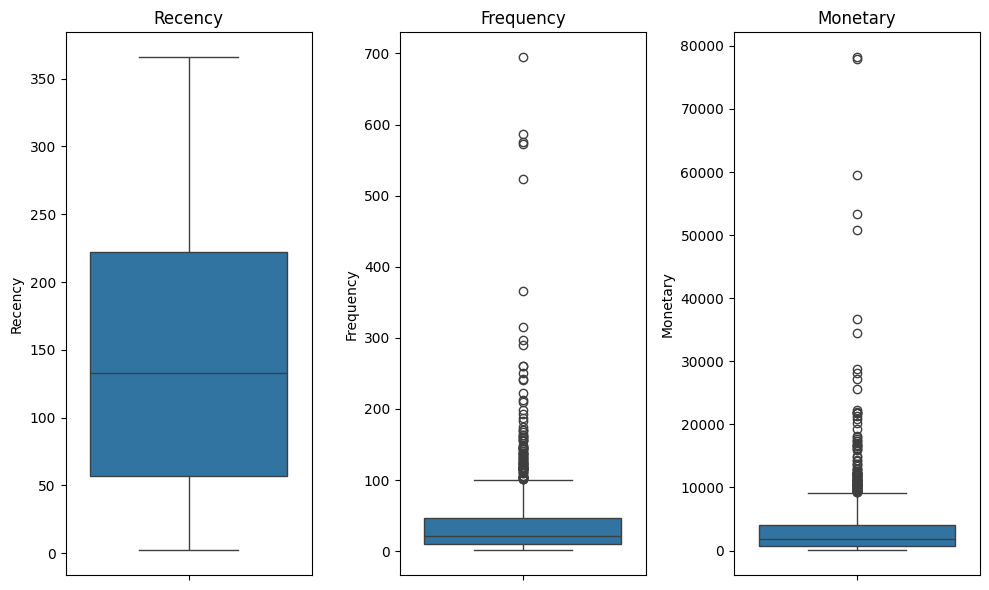

In [30]:
#데이터 분포 탐색

# 박스 플롯으로 4분위 수 시각화
plt.figure(figsize=(10, 6))  # 시각화 창 크기 설정

# 각 변수별로 박스 플롯 그리기
for i, column in enumerate(df_rfm.columns):
    plt.subplot(1, len(df_rfm.columns), i+1)  # 여러 개의 그래프를 나란히 그리기 위한 설정
    sns.boxplot(y=df_rfm[column])
    plt.title(column)  # 각 그래프에 칼럼 이름으로 제목 설정

plt.tight_layout()  # 그래프 간격 조정
plt.show()

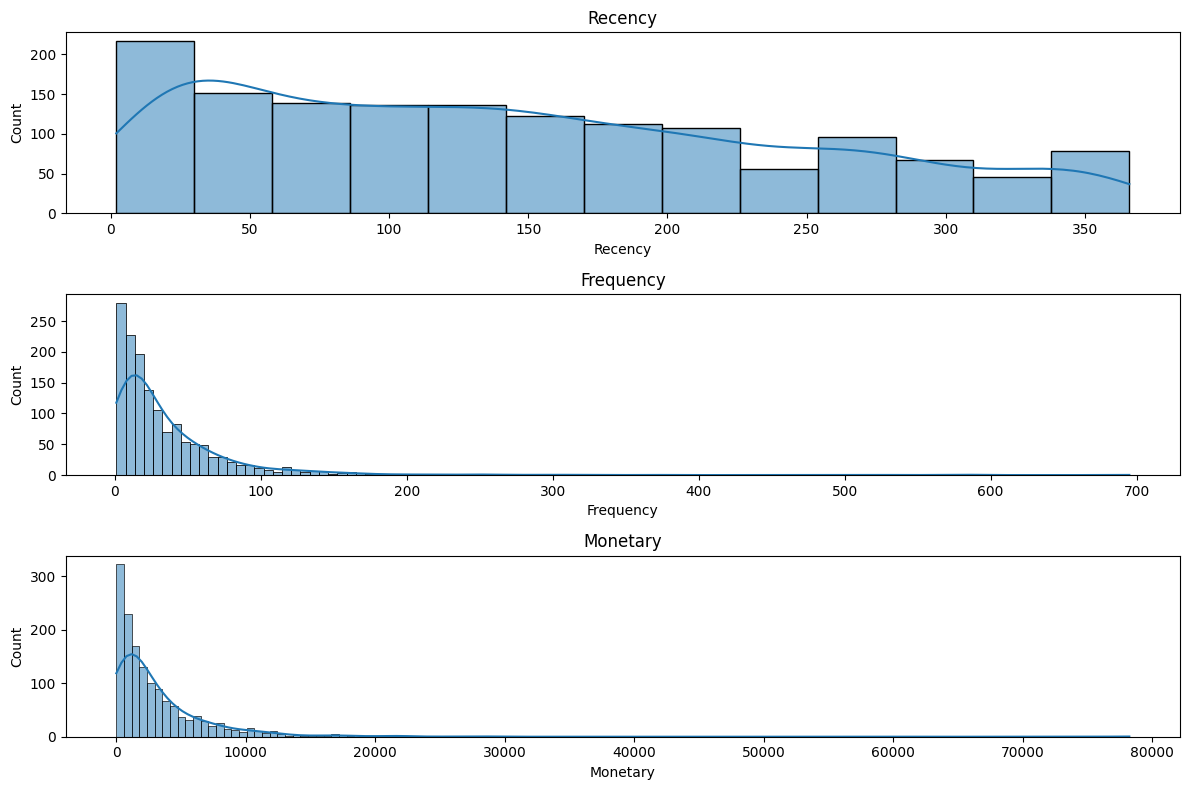

In [31]:
# 정규분포 시각화

plt.figure(figsize=(12, 8))
for i, col in enumerate(df_rfm.columns):
    plt.subplot(3, 1, i + 1)
    sns.histplot(df_rfm[col], kde=True)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

In [32]:
#이상치의 발생과 쏠림현상을 해결하기위하여 제곱근 변환과 로그변환을 실시한다

df_rfm_log=df_rfm.copy()

df_rfm_log['Recency'] = np.sqrt(df_rfm_log['Recency'])
df_rfm_log['Frequency'] = np.log1p(df_rfm_log['Frequency'])
df_rfm_log['Monetary'] = np.log1p(df_rfm_log['Monetary'])

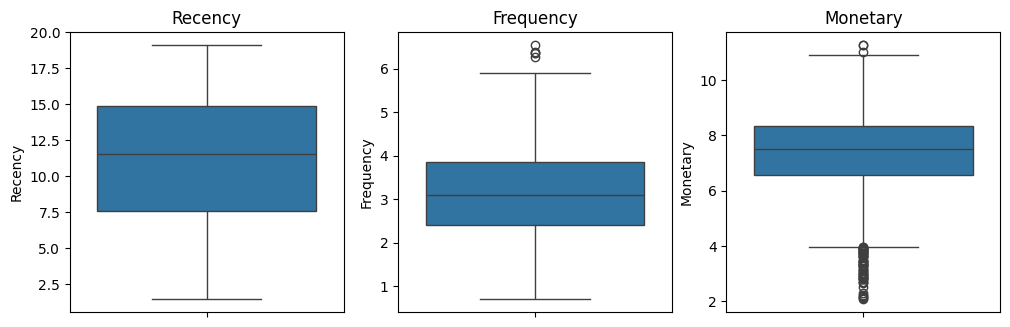

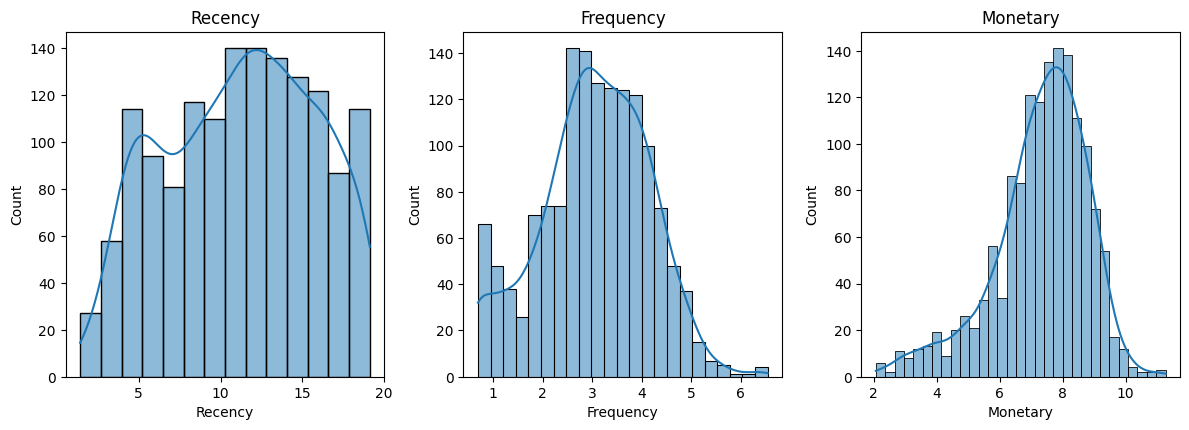

In [33]:
# 박스 플롯으로 4분위 수 시각화
plt.figure(figsize=(12, 8))  # 시각화 창 크기 설정

# 각 변수별로 박스 플롯 그리기
for i, column in enumerate(df_rfm_log.columns):
    plt.subplot(2, len(df_rfm_log.columns), i+1)  # 여러 개의 그래프를 나란히 그리기 위한 설정
    sns.boxplot(y=df_rfm_log[column])
    plt.title(column)  # 각 그래프에 칼럼 이름으로 제목 설정

plt.figure(figsize=(12, 8))
for i, col in enumerate(df_rfm_log.columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_rfm_log[col], kde=True)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()
plt.show()

## RFM 등급 나누기

In [34]:
df_rfm_log.describe()

,Recency,Frequency,Monetary
count,1468.000000,1468.000000,1468.000000
mean,11.198156,3.050209,7.304799
std,4.572502,1.097813,1.487823
min,1.414214,0.693147,2.066863
25%,7.549834,2.397895,6.576193
50%,11.532563,3.091042,7.514650
75%,14.899664,3.850148,8.318777
max,19.131126,6.545350,11.267441


In [35]:
# R,F,M 구간별 등급
df_rfm_ID['R'] = pd.qcut(df_rfm_log['Recency'], q = [0, 0.2,0.4, 0.6, 0.8, 1],
                              labels=[1,2,3,4,5]).astype(int)
df_rfm_ID['F'] = pd.qcut(df_rfm_log['Frequency'], q = [0, 0.2,0.4, 0.6, 0.8, 1],
                              labels=[1,2,3,4,5]).astype(int)
df_rfm_ID['M'] = pd.qcut(df_rfm_log['Monetary'],  q = [0, 0.2,0.4, 0.6, 0.8, 1],
                              labels=[1,2,3,4,5]).astype(int)
df_rfm_ID.head()

,고객ID,Recency,Frequency,Monetary,R,F,M
0,USER_0000,109,2,171.693,3,1,1
1,USER_0001,61,60,13718.492,2,5,5
2,USER_0002,75,23,1508.565,2,3,3
3,USER_0003,19,17,1335.733,1,3,3
4,USER_0004,109,36,1873.212,3,4,3


In [36]:
df_rfm_ID['RFM_Score'] = df_rfm_ID['R'] * 0.1 + df_rfm_ID['F'] * 0.2 + df_rfm_ID['M'] * 0.7
df_rfm_ID

,고객ID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,USER_0000,109,2,171.693,3,1,1,1.2
1,USER_0001,61,60,13718.492,2,5,5,4.7
2,USER_0002,75,23,1508.565,2,3,3,2.9
3,USER_0003,19,17,1335.733,1,3,3,2.8
4,USER_0004,109,36,1873.212,3,4,3,3.2
...,...,...,...,...,...,...,...,...
1463,USER_1463,272,7,811.480,5,1,2,2.1
1464,USER_1464,89,40,2765.158,2,4,4,3.8
1465,USER_1465,196,8,149.497,4,1,1,1.3
1466,USER_1466,71,1,304.000,2,1,1,1.1


In [37]:
# RFM 스코어를 기반으로 등급 나누기
df_rfm_ID['RFM_Rank'] = pd.cut(df_rfm_ID['RFM_Score'], bins=[-np.inf, 2, 3, 4, np.inf], labels=['BRONZE', 'SILVER', 'GOLD', 'VIP'])
df_rfm_ID

,고객ID,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Rank
0,USER_0000,109,2,171.693,3,1,1,1.2,BRONZE
1,USER_0001,61,60,13718.492,2,5,5,4.7,VIP
2,USER_0002,75,23,1508.565,2,3,3,2.9,SILVER
3,USER_0003,19,17,1335.733,1,3,3,2.8,SILVER
4,USER_0004,109,36,1873.212,3,4,3,3.2,GOLD
...,...,...,...,...,...,...,...,...,...
1463,USER_1463,272,7,811.480,5,1,2,2.1,SILVER
1464,USER_1464,89,40,2765.158,2,4,4,3.8,GOLD
1465,USER_1465,196,8,149.497,4,1,1,1.3,BRONZE
1466,USER_1466,71,1,304.000,2,1,1,1.1,BRONZE


In [38]:
df_rfm_ID['RFM_Rank'].value_counts()

,count
RFM_Rank,
BRONZE,389
SILVER,374
GOLD,353
VIP,352


In [39]:
#등급 분포도 시각화
fig = px.scatter(
    df_rfm_ID,
    x = df_rfm_ID['고객ID'].index,
    y = 'RFM_Score',
    color = 'RFM_Rank'
)
fig.show()

# (4) 고객분석


In [40]:
df4 = pd.merge(df2, df_rfm_ID, how = 'left', left_on = '고객ID', right_on = '고객ID')
df4

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,...,할인율,실제수익,Recency,Frequency,Monetary,R,F,M,RFM_Score,RFM_Rank
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,...,10.0,144.839,341,297,36679.912,5,5,5,5.0,VIP
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,...,10.0,144.839,341,297,36679.912,5,5,5,5.0,VIP
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,...,10.0,8.345,341,297,36679.912,5,5,5,5.0,VIP
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,...,10.0,94.150,341,297,36679.912,5,5,5,5.0,VIP
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,...,10.0,21.350,341,297,36679.912,5,5,5,5.0,VIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,...,30.0,127.800,2,8,1100.750,1,1,2,1.7,BRONZE
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,...,30.0,40.744,2,8,1100.750,1,1,2,1.7,BRONZE
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,...,30.0,112.816,2,8,1100.750,1,1,2,1.7,BRONZE
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,...,30.0,409.100,2,2,751.170,1,1,2,1.7,BRONZE


## 성별

In [41]:
df4_gender = df4['성별'].value_counts().reset_index()
df4_gender

,성별,count
0,여,33007
1,남,19917


In [42]:
fig = px.pie(
    df4_gender,
    names='성별',
    values = 'count',
    title='전체 성별',
    hole = 0.3
)
fig.show()

In [43]:
#고객 등급별 성별
df_gender = df4.groupby(by = '고객ID')[['RFM_Rank', '성별']].first().reset_index()
gender_counts = df_gender.groupby(['RFM_Rank', '성별']).size().unstack()
gender_counts

<ipython-input-43-0fd5c92080dd>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



성별,남,여
RFM_Rank,,
BRONZE,128,261
SILVER,138,236
GOLD,132,221
VIP,136,216


In [44]:
fig = px.bar(gender_counts,
             x=gender_counts.index,
             y=['남', '여'],
             title='등급별 성별 분포',
             labels={'x': 'RFM Rank', 'y': 'Count', '성별': '성별'},
             barmode='group')

fig.show()

## 지역

In [45]:
#고객 등급별 지역
df_region = df4.groupby(by = '고객ID')[['RFM_Rank', '고객지역']].first().reset_index()
region_counts = df_region.groupby(['RFM_Rank', '고객지역']).size().unstack()
region_counts

<ipython-input-45-7ebc266f5fa6>:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



고객지역,California,Chicago,New Jersey,New York,Washington DC
RFM_Rank,,,,,
BRONZE,130,111,43,84,21
SILVER,116,113,42,90,13
GOLD,106,125,33,71,18
VIP,112,107,31,79,23


In [46]:
fig = px.bar(region_counts,
             x=region_counts.index,
             y=region_counts.columns,
             title='등급별 지역 분포',
             labels={'x': 'RFM Rank', 'y': 'Count', '고객지역': '고객지역'},
             barmode='group')

fig.show()

## 월간 거래수, 총수익

In [47]:
df2['월'] = df2['거래날짜'].dt.month
df_제품 = df2.groupby(by = ['월','제품카테고리']).agg(
    총수익 = ('실제수익', 'sum'),
    거래수 = ('거래ID', 'count')
).reset_index()
df_제품

,월,제품카테고리,총수익,거래수
0,1,Accessories,58.070,1
1,1,Android,96.116,4
2,1,Apparel,52537.285,960
3,1,Backpacks,309.210,3
4,1,Bags,13734.362,155
...,...,...,...,...
202,12,Nest-Canada,4940.146,26
203,12,Nest-USA,264864.850,1534
204,12,Notebooks & Journals,830.280,9
205,12,Office,19766.642,385


In [48]:
#상위 품목 3개를 제거해서 하위 품목 확인
filtered_제품 = ['Nest-USA', 'Apparel']
filtered_df = df_제품[~df_제품['제품카테고리'].isin(filtered_제품)]
filtered_df

,월,제품카테고리,총수익,거래수
0,1,Accessories,58.070,1
1,1,Android,96.116,4
3,1,Backpacks,309.210,3
4,1,Bags,13734.362,155
5,1,Bottles,1068.677,16
...,...,...,...,...
201,12,Nest,138671.468,712
202,12,Nest-Canada,4940.146,26
204,12,Notebooks & Journals,830.280,9
205,12,Office,19766.642,385


In [49]:
fig1 = px.line(
    df_제품,
    x = '월',
    y= '총수익',
    color = '제품카테고리',
    title = '월간 제품별 총수익'
)

fig2 = px.line(
    filtered_df,
    x = '월',
    y= '총수익',
    color = '제품카테고리',
    title = '필터링 된 월간 제품별 총수익'
)
fig1.show()
fig2.show()

In [50]:

fig3 = px.line(
    df_제품,
    x = '월',
    y= '거래수',
    color = '제품카테고리',
    title = '월간 제품별 거래 수'
)
fig4 = px.line(
    filtered_df,
    x = '월',
    y= '거래수',
    color = '제품카테고리',
    title = '필터링 된 월간 제품별 거래 수'
)
fig3.show()
fig4.show()

## 2. 등급별 많이 판매된 제품

In [51]:
df4['거래날짜'] = pd.to_datetime(df4.거래날짜)
df4['월_num'] = df4['거래날짜'].dt.month

In [52]:
rank_제품 = df4.groupby(by = ['월_num','제품카테고리','RFM_Rank']).agg(
    총수익 = ('실제수익', 'sum'),
    거래수 = ('거래ID', 'count')
).reset_index()
rank_제품

<ipython-input-52-89d8c0e186e3>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,월_num,제품카테고리,RFM_Rank,총수익,거래수
0,1,Accessories,BRONZE,0.000,0
1,1,Accessories,SILVER,0.000,0
2,1,Accessories,GOLD,58.070,1
3,1,Accessories,VIP,0.000,0
4,1,Android,BRONZE,0.000,0
...,...,...,...,...,...
955,12,Office,VIP,12359.195,192
956,12,Waze,BRONZE,128.809,11
957,12,Waze,SILVER,139.254,6
958,12,Waze,GOLD,134.862,10


In [53]:
vip = rank_제품[rank_제품['RFM_Rank'] == 'VIP']
vip_top = vip.sort_values(by = '거래수',ascending = False).head(10)
vip_top

,월_num,제품카테고리,RFM_Rank,총수익,거래수
491,7,Apparel,VIP,61400.631,1526
571,8,Apparel,VIP,37798.274,1416
331,5,Apparel,VIP,48026.244,1200
171,3,Apparel,VIP,49363.328,952
251,4,Apparel,VIP,71336.260,945
67,1,Nest-USA,VIP,171385.221,937
867,11,Nest-USA,VIP,166334.410,922
651,9,Apparel,VIP,44623.821,919
147,2,Nest-USA,VIP,167468.170,913
947,12,Nest-USA,VIP,150202.624,863


In [54]:
gold = rank_제품[rank_제품['RFM_Rank'] == 'GOLD']
gold_top = gold.sort_values(by = '거래수',ascending = False).head(10)
gold_top

,월_num,제품카테고리,RFM_Rank,총수익,거래수
570,8,Apparel,GOLD,18550.854,731
410,6,Apparel,GOLD,16872.003,533
330,5,Apparel,GOLD,17139.046,478
866,11,Nest-USA,GOLD,64458.840,379
466,6,Nest-USA,GOLD,61860.860,373
66,1,Nest-USA,GOLD,64624.081,363
946,12,Nest-USA,GOLD,61705.464,357
650,9,Apparel,GOLD,11739.003,335
490,7,Apparel,GOLD,10844.554,331
730,10,Apparel,GOLD,10516.562,331


In [55]:
silver = rank_제품[rank_제품['RFM_Rank'] == 'SILVER']
silver_top = silver.sort_values(by = '거래수',ascending = False).head(10)
silver_top

,월_num,제품카테고리,RFM_Rank,총수익,거래수
569,8,Apparel,SILVER,14045.640,534
889,12,Apparel,SILVER,8040.266,246
65,1,Nest-USA,SILVER,44717.361,237
489,7,Apparel,SILVER,6876.642,234
249,4,Apparel,SILVER,12140.995,232
409,6,Apparel,SILVER,6943.750,201
625,8,Nest-USA,SILVER,33800.240,199
945,12,Nest-USA,SILVER,33803.634,198
649,9,Apparel,SILVER,4708.747,168
329,5,Apparel,SILVER,4404.034,154


In [56]:
bronze = rank_제품[rank_제품['RFM_Rank'] == 'BRONZE']
bronze_top = bronze.sort_values(by = '거래수',ascending = False).head(10)
bronze_top

,월_num,제품카테고리,RFM_Rank,총수익,거래수
568,8,Apparel,BRONZE,3587.710,139
888,12,Apparel,BRONZE,3268.272,123
944,12,Nest-USA,BRONZE,19153.128,116
728,10,Apparel,BRONZE,2603.182,115
408,6,Apparel,BRONZE,2929.129,108
488,7,Apparel,BRONZE,2192.820,91
248,4,Apparel,BRONZE,3240.160,83
648,9,Apparel,BRONZE,1815.400,73
168,3,Apparel,BRONZE,1814.334,56
784,10,Nest-USA,BRONZE,10586.710,55


In [57]:
fig_bronze = px.line(
    bronze,
    x = '월_num',
    y = '거래수',
    color = '제품카테고리',
    title = 'BRONZE 월별 카테고리 거래 수'
)
fig_silver = px.line(
    silver,
    x = '월_num',
    y = '거래수',
    color = '제품카테고리',
    title = 'SILVER 월별 카테고리 거래 수'
)
fig_gold = px.line(
    gold,
    x = '월_num',
    y = '거래수',
    color = '제품카테고리',
    title = 'GOLD 월별 카테고리 거래 수'
)
fig_vip = px.line(
    vip,
    x = '월_num',
    y = '거래수',
    color = '제품카테고리',
    title = 'VIP 월별 카테고리 거래 수'
)
fig_bronze.show()
fig_silver.show()
fig_gold.show()
fig_vip.show()

## 등급별 월간 거래 현황

In [58]:
rank_총수익 = rank_제품.groupby(by='RFM_Rank')[['총수익', '거래수']].sum().reset_index()
rank_총수익

<ipython-input-58-f37e31702e1f>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,RFM_Rank,총수익,거래수
0,BRONZE,148996.428,2319
1,SILVER,502855.962,6173
2,GOLD,1045473.933,11980
3,VIP,3217722.847,32452


In [59]:
#월간 거래수
df_거래 =rank_제품.groupby(by = ['월_num','RFM_Rank'])[['거래수', '총수익']].sum().reset_index()
fig = px.line(
    df_거래,
    x = '월_num',
    y = '거래수',
    color = 'RFM_Rank',
)
fig.show()

<ipython-input-59-26f67212fdde>:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [60]:
#월간 총수익
fig = px.line(
    df_거래,
    x = '월_num',
    y = '총수익',
    color = 'RFM_Rank',
)
fig.show()

## 쿠폰 사용량

In [61]:
#쿠폰사용량
df_쿠폰 =  df4[['RFM_Rank', '제품카테고리', '쿠폰상태','거래ID']]
df_쿠폰['쿠폰상태'] = df_쿠폰['쿠폰상태'].apply(lambda x: 1 if x == 'Used' else 0)
df_쿠폰 = df_쿠폰.groupby(by = ['RFM_Rank', '제품카테고리'])[['쿠폰상태', '거래ID']].agg(
    쿠폰거래=('쿠폰상태', 'sum'),
    거래수=('거래ID', 'count')
).reset_index()
df_쿠폰['쿠폰사용비율'] = df_쿠폰['쿠폰거래']/df_쿠폰['거래수']
df_쿠폰

# 쿠폰 used 한 고객들 뽑아냄
# 거래 날짜, 제품 카테고리, 쿠폰 사용 used count

<ipython-input-61-9ba8a8ed3d03>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-9ba8a8ed3d03>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,RFM_Rank,제품카테고리,쿠폰거래,거래수,쿠폰사용비율
0,BRONZE,Accessories,4,14,0.285714
1,BRONZE,Android,0,1,0.000000
2,BRONZE,Apparel,345,919,0.375408
3,BRONZE,Backpacks,1,2,0.500000
4,BRONZE,Bags,29,82,0.353659
...,...,...,...,...,...
75,VIP,Nest-Canada,47,190,0.247368
76,VIP,Nest-USA,2974,8831,0.336768
77,VIP,Notebooks & Journals,165,479,0.344468
78,VIP,Office,1352,3892,0.347379


In [62]:
fig = px.bar(
    df_쿠폰,
    x = '제품카테고리',
    y= '쿠폰사용비율',
    color = 'RFM_Rank',
    hover_data=['거래수', '쿠폰거래'],
    title='제품 카테고리별 등급에 따른 쿠폰 사용 비율'
)
fig.show()

VIP등급에선 More Bags의 쿠폰 사용비율이 가장 높음

GOLD등급에선 Fun, Notebooks & Journals 쿠폰 사용비율이 높음

SILVER등급에선 표본은 적지만 Backpacks, Google, Gift Card의 쿠폰 사용비율이 높음

BRONZE등급에선 Apparel,Nest-Canada, Office 등이 높음

**=> 등급에 따라 쿠폰 사용율이 높은 제품에 쿠폰을 제공할 수 있다.**

# (5) 제품분석

In [63]:
# dfdf = df4.groupby(by = ['거래날짜', '제품카테고리'])['거래ID'].count()
df_corr = df4.pivot_table(
    index = '거래날짜',
    columns = '제품카테고리',
    values = '거래ID',
    aggfunc = 'count'

).fillna(0)
df_corr.head()

제품카테고리,Accessories,Android,Apparel,Backpacks,Bags,Bottles,Drinkware,Fun,Gift Cards,Google,Headgear,Housewares,Lifestyle,More Bags,Nest,Nest-Canada,Nest-USA,Notebooks & Journals,Office,Waze
거래날짜,,,,,,,,,,,,,,,,,,,,
2019-01-01,0.0,0.0,20.0,0.0,5.0,0.0,9.0,1.0,0.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,32.0,1.0,14.0,1.0
2019-01-02,0.0,0.0,23.0,1.0,2.0,0.0,3.0,2.0,0.0,1.0,3.0,0.0,8.0,0.0,0.0,6.0,53.0,0.0,12.0,1.0
2019-01-03,0.0,0.0,32.0,0.0,9.0,1.0,16.0,0.0,1.0,1.0,3.0,0.0,10.0,0.0,0.0,3.0,103.0,1.0,24.0,3.0
2019-01-04,0.0,0.0,32.0,0.0,12.0,0.0,15.0,0.0,0.0,1.0,2.0,0.0,12.0,2.0,0.0,3.0,64.0,0.0,26.0,0.0
2019-01-05,0.0,0.0,38.0,0.0,9.0,3.0,26.0,0.0,2.0,2.0,4.0,3.0,15.0,0.0,0.0,0.0,53.0,5.0,23.0,6.0


## 제품 별 상관관계

<Axes: xlabel='제품카테고리', ylabel='제품카테고리'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 51228 (\N{HANGUL SYLLABLE JE}) 

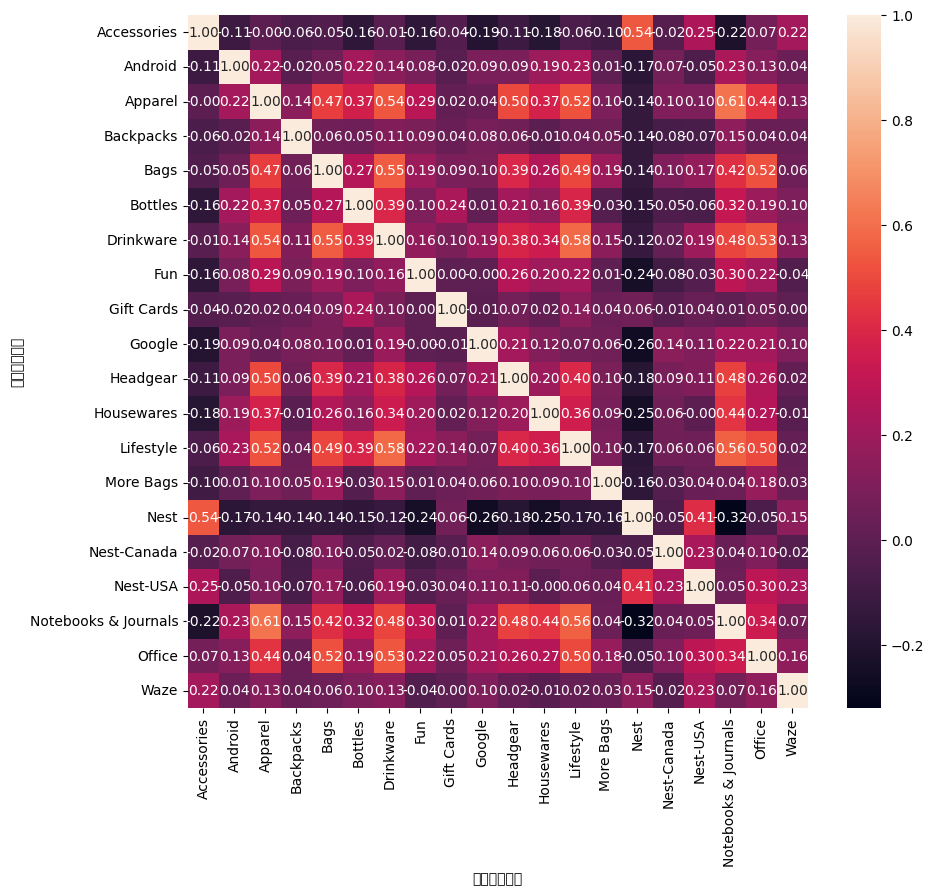

In [64]:
corr = df_corr.corr()
plt.figure(figsize = (10,9))
sns.heatmap(corr, annot = True, fmt = '.2f')


**'Apparel', 'Notebooks & Journals' 강한 양의 상관관계**

**'Nest', 'Accessories' 양의 상관관계**

**'Nest', 'Notebooks & Journals' 음의 상관관계**

**'Accessories', 'Notebooks & Journals' 음의 상관관계**





In [65]:
fig = px.scatter_matrix(
    df_corr[['Accessories','Apparel', 'Notebooks & Journals','Nest']],
    height = 800,
    width = 1000,
    opacity = .5
)
fig.show()

Nest와 Accessories는 양의 상관관계로 판매량이 높은 Nest를 기준으로 Accessories 상품을 추천해 줄 수 있다. 또한 Notebooks & Journals는 Nest와 Accessories와 음의 상관관계를 띄고 있으므로 대체 상품 등으로 활용할 수 있다.

판매량이 높은 Apparel를 통해 강한 양의 상관관계를 띄는 Notebooks & Journals를 고객에게 추천함으로써 Notebooks & Journals의 판매량을 높일 수 있다.

# (5) 마케팅 분석

In [66]:
#월별 평균 마케팅 비용 확인
Marketing['월'] = Marketing['날짜'].dt.month
df_마케팅 = Marketing.groupby(by = '월')[['오프라인비용', '온라인비용']].mean().reset_index()
df_마케팅['총 마케팅비용'] = df_마케팅['오프라인비용'] + df_마케팅['온라인비용']
df_마케팅

,월,오프라인비용,온라인비용,총 마케팅비용
0,1,3116.129032,1881.579032,4997.708065
1,2,2903.571429,1993.140000,4896.711429
2,3,2370.967742,1572.583548,3943.551290
3,4,3200.000000,2034.227667,5234.227667
4,5,2112.903226,1701.923871,3814.827097
5,6,2683.333333,1793.938000,4477.271333
6,7,2177.419355,1700.575806,3877.995161
7,8,2758.064516,1851.746774,4609.811290
8,9,2766.666667,1750.484667,4517.151333
9,10,3016.129032,1862.085484,4878.214516


In [67]:
df_melted = pd.melt(df_마케팅, id_vars='월', value_vars=['오프라인비용', '온라인비용', '총 마케팅비용'],
                    var_name='비용 유형', value_name='비용')

In [68]:
fig = px.line(df_melted,
              x='월',
              y='비용',
              color='비용 유형',
              title='월별 평균 온라인 및 오프라인 비용')
fig.show()

In [69]:

df_월_수익_거래 = df4.groupby(by = '월_num').agg(
    총수익 = ('실제수익', 'sum'),
    거래수 = ('거래ID', 'count')
).reset_index()
df_마케팅_거래 = pd.merge(df_마케팅,df_월_수익_거래, how = 'left', left_on = '월', right_on = '월_num')
df_마케팅_거래.drop('월_num',axis = 1)

,월,오프라인비용,온라인비용,총 마케팅비용,총수익,거래수
0,1,3116.129032,1881.579032,4997.708065,449844.935,4063
1,2,2903.571429,1993.140000,4896.711429,340515.170,3284
2,3,2370.967742,1572.583548,3943.551290,375759.188,4346
3,4,3200.000000,2034.227667,5234.227667,429478.168,4150
4,5,2112.903226,1701.923871,3814.827097,330083.936,4572
5,6,2683.333333,1793.938000,4477.271333,326307.031,4193
6,7,2177.419355,1700.575806,3877.995161,409244.277,5251
7,8,2758.064516,1851.746774,4609.811290,434086.232,6150
8,9,2766.666667,1750.484667,4517.151333,361527.145,4288
9,10,3016.129032,1862.085484,4878.214516,442108.177,4164


## 회귀분석

In [70]:
# 온, 오프라인 비용이 총 수익에 어떤 영향을 끼치는 확인하기 위해 선형회귀 진행
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df_마케팅_거래[['오프라인비용', '온라인비용']]
y = df_마케팅_거래['총수익']

# 특성 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련
model.fit(X_train, y_train)

# 테스트 세트를 사용하여 예측
y_pred = model.predict(X_test)

# 회귀 계수 출력
print("회귀 계수 (기울기):", model.coef_)


회귀 계수 (기울기): [15090.43782343 23907.36148755]


**오프라인 비용의 계수: 15090.43, 이는 오프라인 비용이 1 표준편차 증가할 때 총수익이 약 15090.43 단위 증가함을 의미합니다.**


**온라인 비용의 계수: 23097.36, 이는 온라인 비용이 1 표준편차 증가할 때 거래 수가 약 23097.36 단위 증가함을 의미합니다.**

## 산점도

In [71]:
# 산점도 오프라인비용
fig = px.scatter(df_마케팅_거래, x='총 마케팅비용', y='총수익',
                 title='총 마케팅 비용에 따른 월별 거래 수와 총수익-오프라인비용',
                 color = '오프라인비용',
                 hover_name = '월',
                 size = '거래수'
)

# 그래프 표시
fig.show()
# 산점도 온라인비용
fig2 = px.scatter(df_마케팅_거래, x='총 마케팅비용', y='총수익',
                 title='총 마케팅 비용에 따른 월별 거래 수와 총수익-온라인비용',
                 color = '온라인비용',
                 hover_name = '월',
                 size = '거래수'
)

# 그래프 표시
fig2.show()

**12월의 경우 총마케팅비용이 가장 높으며 총수익도 가장 많았다.**

**11월의 경우 총마케팅비용은 12월보다 비교적 적었지만 총수익은 비슷했으며 오프라인 비용보다 온라인비용이 더 큰 것으로 온라인 마케팅 효과가 크다는 것을 알 수 있다.**

**8월의 경우 총마케팅비용과 총수익이 많지는 않지만 거래수 가장 많은 것으로 보아 이때 할인을 많이 했다는 것을 유추할 수 있다.**

**2월의 경우 총 마케팅 비용은 많지만 총수익과 거래수가 적어 마케팅 효과가 미미했다는 것을 알 수 있다.**